# Введение в машинное обучение

Данные по клиентам заархивированы в формате zip - разархивируем их с помощью библиотеки zipfile.

In [1]:
import zipfile
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
with zipfile.ZipFile('../datasets/client_info.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('../datasets')

In [3]:
df = pd.read_csv('../datasets/client_info.csv')

In [4]:
df.head(5)

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,APP_REGISTR_RGN_CODE,TURNOVER_DYNAMIC_IL_1M,LDEAL_YQZ_COM_GROUP,LDEAL_YQZ_CHRG_GROUP,AVG_PCT_MONTH_TO_PCLOSE_GROUP,MAX_PCLOSE_DATE_GROUP,AVG_PCT_DEBT_TO_DEAL_AMT_GROUP,...,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,TARGET
0,146841,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.593023,0.0,0.0,0.483032,0.406780,0.0,0.0,0.0,0.0,0
1,146842,0,0.041033,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.587647,0.0,0.0,0.394340,0.545455,0.0,0.0,0.0,0.0,0
2,146843,0,0.006915,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.587647,0.0,0.0,0.399342,0.297297,0.0,0.0,0.0,0.0,0
3,146844,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.583333,0.0,0.0,0.552169,0.558824,0.0,0.0,0.0,0.0,0
4,146845,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.583333,0.0,0.0,0.611610,0.620690,0.0,0.0,0.0,0.0,0


### Task 1

Колонку **ID** сделаем индексом таблицы

In [5]:
df.set_index('ID', inplace=True)
df.head()

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,APP_REGISTR_RGN_CODE,TURNOVER_DYNAMIC_IL_1M,LDEAL_YQZ_COM_GROUP,LDEAL_YQZ_CHRG_GROUP,AVG_PCT_MONTH_TO_PCLOSE_GROUP,MAX_PCLOSE_DATE_GROUP,AVG_PCT_DEBT_TO_DEAL_AMT_GROUP,LDEAL_AMT_MONTH_GROUP,...,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
146841,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.593023,0.0,0.0,0.483032,0.406780,0.0,0.0,0.0,0.0,0
146842,0,0.041033,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.587647,0.0,0.0,0.394340,0.545455,0.0,0.0,0.0,0.0,0
146843,0,0.006915,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.587647,0.0,0.0,0.399342,0.297297,0.0,0.0,0.0,0.0,0
146844,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.583333,0.0,0.0,0.552169,0.558824,0.0,0.0,0.0,0.0,0
146845,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.583333,0.0,0.0,0.611610,0.620690,0.0,0.0,0.0,0.0,0


### Task 2

Признаки сохраним в переменную `X`. Целевую переменную **'TARGET'**, которую мы будем предсказывать, в переменную `Y` \
Выведем размерность этих таблиц

In [6]:
X = df.drop('TARGET', axis = 1) # признаки
Y = df['TARGET'] # целевая переменная 
Y = pd.DataFrame(Y) # преобразуем в датасет целевую переменную

print('X -', X.shape)
print('Y -', Y.shape)

X - (355190, 103)
Y - (355190, 1)


### Task 3

Признаки содержат в себе как количественные, так и категориальные переменные \
Категориальные переменные сохрани в переменную `X_cat`, а количественные в `X_num` \
Выведем число категориальных и количественные переменных

In [7]:
X_cat=X.select_dtypes(include=['object']) # категориальные
X_num=X.select_dtypes(include=['int', 'float']) # количественные

print('Число категориальных переменных -', len(X_cat.columns))
print('Число количественные переменных -', len(X_num.columns))

Число категориальных переменных - 56
Число количественные переменных - 47


### Task 4

Предобработка количественныех переменных. Проведём стандартизацию для признаков `X_num` \
Выведем среднее и стандартное отклонение по датасету для каждого признака после стандартизации

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#X_num.head(5)
X_num_scal = scaler.fit_transform(X_num) # стандартизация
X_num_scal_df = pd.DataFrame(X_num_scal, columns = X_num.columns) # преобразуем в датасет после стандартизации
#X_num_scal_df.head(5)
X_num_scal_df_mean = round(X_num_scal_df.mean(), 2) # среднее отклонение
X_num_scal_df_std = round(X_num_scal_df.std(), 2) # стандартное отклонение
print('Среднее отклонение после стандартизации\n', X_num_scal_df_mean, '\nСтандартное отклонение после стандартизации\n', X_num_scal_df_std)

Среднее отклонение после стандартизации
 CR_PROD_CNT_IL              0.0
AMOUNT_RUB_CLO_PRC          0.0
TURNOVER_DYNAMIC_IL_1M     -0.0
AMOUNT_RUB_SUP_PRC          0.0
REST_DYNAMIC_FDEP_1M        0.0
REST_DYNAMIC_SAVE_3M       -0.0
CR_PROD_CNT_VCU            -0.0
REST_AVG_CUR               -0.0
AMOUNT_RUB_NAS_PRC          0.0
TRANS_COUNT_SUP_PRC        -0.0
TRANS_COUNT_NAS_PRC         0.0
CR_PROD_CNT_TOVR           -0.0
CR_PROD_CNT_PIL            -0.0
TURNOVER_CC                 0.0
TRANS_COUNT_ATM_PRC         0.0
AMOUNT_RUB_ATM_PRC          0.0
TURNOVER_PAYM              -0.0
AGE                         0.0
CR_PROD_CNT_CC              0.0
REST_DYNAMIC_FDEP_3M       -0.0
REST_DYNAMIC_IL_1M          0.0
CR_PROD_CNT_CCFP            0.0
REST_DYNAMIC_CUR_1M        -0.0
REST_AVG_PAYM              -0.0
LDEAL_GRACE_DAYS_PCT_MED   -0.0
REST_DYNAMIC_CUR_3M         0.0
CNT_TRAN_SUP_TENDENCY3M     0.0
TURNOVER_DYNAMIC_CUR_1M    -0.0
REST_DYNAMIC_PAYM_3M        0.0
SUM_TRAN_SUP_TENDENCY3M     0.0

### Task 5

Трансформируем категориальными признаками с помощью *One-Hot Encoding*, т.к. алгоритм машинного обучения плохо работает с категориальными признаками \
Удали признак *CLNT_JOB_POSITION*, т.к. у него слишком много значений \
Выведем количество колонок таблицы `X_cat_ohe`

In [9]:
from sklearn.preprocessing import OneHotEncoder

X_cat_1 = X_cat.drop(columns='CLNT_JOB_POSITION')
#X_cat.shape
ohe = OneHotEncoder(sparse_output = False, handle_unknown='ignore')
X_cat_ohe = ohe.fit_transform(X_cat_1) # трансформируем категориальные признаки в числовые
X_cat_ohe = pd.DataFrame(X_cat_ohe, columns = ohe.get_feature_names_out()) # преобразуем в датасет после трансформации и создаём имена новым колонкам

print('Количество колонок таблицы X_cat_ohe -', len(X_cat_ohe.columns))
#X_cat_ohe

Количество колонок таблицы X_cat_ohe - 323


### Task 6

Два предобработанных датасета объединим в один. Результат запиши в переменную `X_ready`. Датасет сохраняем в папку *datasets/data_prepared.csv* \
Получившийся датасет делим на **train** и **test**. Процент тестовой выборки 20% \
Выведем размерность обучающей выборки `X_train`


In [10]:
X_ready = pd.concat([X_cat_ohe, X_num_scal_df], axis=1) # объединяем датасеты с преобразоваными количественными и категориальными переменными
#X_ready.shape

X_ready.to_csv('../datasets/data_prepared.csv', index= False) # сохраняем датасет datasets/data_prepared.csv

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_ready, Y, test_size=0.2, random_state=21) # делим X_ready и Y на тестовую и обучающую выборки
print('Размерность обучающей выборки X_train -', X_train.shape)

Размерность обучающей выборки X_train - (284152, 370)


### Task 7

Обучаем логистическую регрессию \
Посчитаем `accuracy` модели на тестовой выборке, сравним предсказанные значения с реальными

In [11]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', fit_intercept=False, penalty='l1', random_state=21) # объявляем модель
log_reg.fit(X_train, Y_train.values.ravel()) # обучаем модель
Y_pred = log_reg.predict(X_test) # получаем предсказаные значения

from sklearn import metrics
accuracy = metrics.accuracy_score (Y_test, Y_pred) # cравниваем тестовые значения с предсказаными, т.е. точность предсказаний
print('Значение accuracy -', accuracy)

Значение accuracy - 0.9197331005940482


### Task 8

Посчитаем процент клиентов в тестовой выборке, у которых индикатор оттока равен 0, и сравним с `accuracy`

In [12]:
pr_clt_0indicator = Y_test.value_counts()[0]/len(Y_test)*100
print('Процент клиентов, у которых индикатор оттока равен 0 -', pr_clt_0indicator)

Процент клиентов, у которых индикатор оттока равен 0 - 91.96064078380584


### Task 9

Построим график,  топ-10 самых важных факторов по мнению модели в абсолютном значении с помощью функции **feature_importanse**

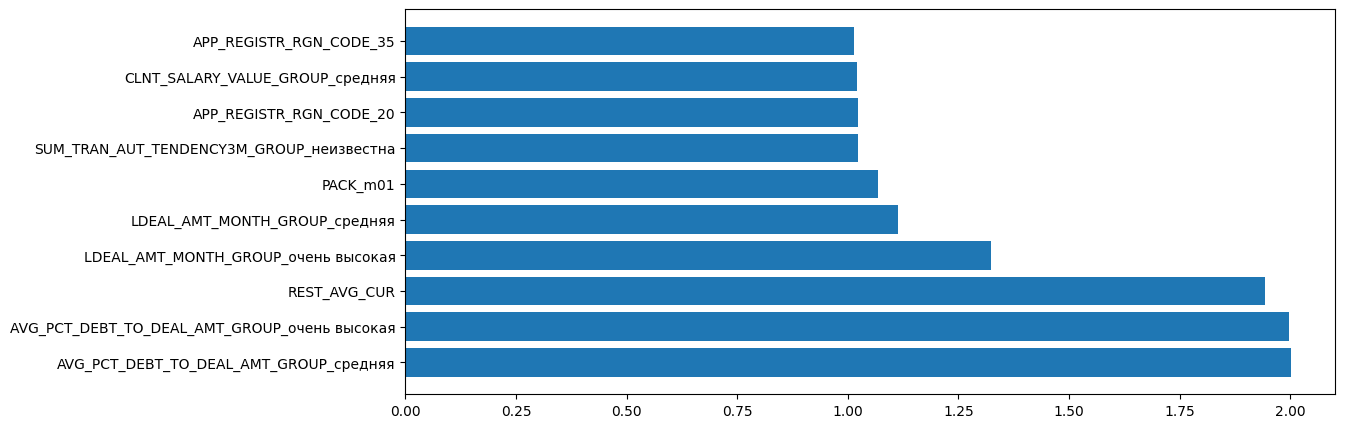

In [13]:
def f_importances(weights, names, top=-1):
    weights, names = zip(*sorted(list(zip(weights, names))))

    # Show all features
    if top == -1:
        top = len(names)
    plt.figure(figsize=(12, 5))
    plt.barh(range(top), weights[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

coeffic = log_reg.coef_[0] # коэфициент модели
absolute = np.abs(coeffic) # абсолютные значения коэффициентов

f_importances(absolute, X_ready.columns, top=10)